# 1. Representing Time in Connectionist Networks

This notebook explores how time has been represented in artificial neural networks. There are complex, mathematical models. However, we examine three straightforward methods.

For this exploration, we will use the encoding method from this week's lab.

First, we define some text:

In [1]:
text = ("This is a test. Ok. What comes next? Depends? Yes. " +
        "This is also a way of testing prediction. Ok. " +
        "This is fine. Need lots of data. Ok?")

And an encoding methodology:

In [2]:
letters = list(set([letter for letter in text]))

def encode(letter):
    index = letters.index(letter)
    binary = [0] * len(letters)
    binary[index] = 1
    return binary

patterns = {letter: encode(letter) for letter in letters}

## 1.1 NETTalk (1987)

Consider the problem of reading. That is, given input text, produce a representation of pronouncing that text.

Consider the word "cache". The first "c" is pronounced /k/, but the second "c" is pronounced /sh/. Now consider the made-up word: Tacoche. How would you pronounce it? How do you even go about making a guess?

In 1987, the program NETTalk was created to attempt to solve this problem.

<img src="images/nettalk.png" width="480"/>

In [3]:
203 / 7

29.0

Additional input units are called **context** or **state** units.

How is time represented in NETTalk?

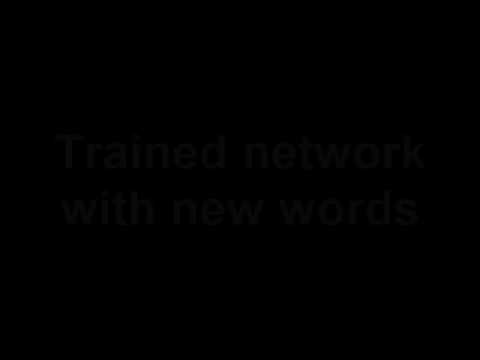

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("gakJlr3GecE", width=600)

In [5]:
from conx import Network

class NETTalk(Network):
    def initialize_inputs(self):
        pass

    def inputs_size(self):
        # Return the number of inputs:
        return len(text)

    def get_letter(self, i):
        if 0 <= i < len(text):
            return text[i]
        else:
            return text[0]
    
    def get_inputs(self, i):
        inputs = []
        for index in range(i - 3, i + 3 + 1):
            letter = text[i]
            inputs += patterns[letter]
        return [inputs, inputs]

In [18]:
pattern_length = len(patterns[" "])
input_length = pattern_length * 7

nettalk = NETTalk(input_length, 80, input_length)

In [19]:
"".join([str(v) for v in nettalk.get_inputs(0)[0]])

'00000000100000000000000000000000000001000000000000000000000000000010000000000000000000000000000100000000000000000000000000001000000000000000000000000000010000000000000000000000000000100000000000000000000'

In [8]:
nettalk.train(report_rate=10, max_training_epochs=500)

--------------------------------------------------
Training for max trails: 500 ...
Epoch: 0 TSS error: 13070.2553377 %correct: 0.0
Epoch: 10 TSS error: 716.730931536 %correct: 0.0
Epoch: 20 TSS error: 468.573515397 %correct: 0.0
Epoch: 30 TSS error: 431.95824528 %correct: 0.0
Epoch: 40 TSS error: 416.634038769 %correct: 0.0
Epoch: 50 TSS error: 265.945084501 %correct: 0.37593984962406013
Epoch: 60 TSS error: 261.9540547 %correct: 0.42105263157894735
Epoch: 70 TSS error: 251.242554953 %correct: 0.47368421052631576
Epoch: 80 TSS error: 249.358370138 %correct: 0.42857142857142855
Epoch: 90 TSS error: 240.833746482 %correct: 0.47368421052631576
Epoch: 100 TSS error: 238.423773943 %correct: 0.47368421052631576
Epoch: 110 TSS error: 236.585542687 %correct: 0.47368421052631576
Epoch: 120 TSS error: 235.335515939 %correct: 0.47368421052631576
Epoch: 130 TSS error: 234.6405665 %correct: 0.46616541353383456
Epoch: 140 TSS error: 232.128789819 %correct: 0.47368421052631576
Epoch: 150 TSS error: 

In [9]:
nettalk.get_history()

[[0, 13070.255337690462, 0.0],
 [10, 716.73093153640559, 0.0],
 [20, 468.57351539725056, 0.0],
 [30, 431.95824528003442, 0.0],
 [40, 416.63403876878135, 0.0],
 [50, 265.9450845005108, 0.37593984962406013],
 [60, 261.95405469996177, 0.42105263157894735],
 [70, 251.24255495313702, 0.47368421052631576],
 [80, 249.35837013797794, 0.42857142857142855],
 [90, 240.83374648196263, 0.47368421052631576],
 [100, 238.42377394323839, 0.47368421052631576],
 [110, 236.5855426873446, 0.47368421052631576],
 [120, 235.33551593933615, 0.47368421052631576],
 [130, 234.64056650023889, 0.46616541353383456],
 [140, 232.12878981907664, 0.47368421052631576],
 [150, 223.95446376119079, 0.47368421052631576],
 [160, 222.84421174504089, 0.47368421052631576],
 [170, 218.78097129678011, 0.47368421052631576],
 [180, 212.34858482531087, 0.38345864661654133],
 [190, 208.88024185073471, 0.47368421052631576],
 [200, 200.66979473088767, 0.47368421052631576],
 [210, 199.0492279875393, 0.45112781954887216],
 [220, 185.85793

<IPython.core.display.Javascript object>


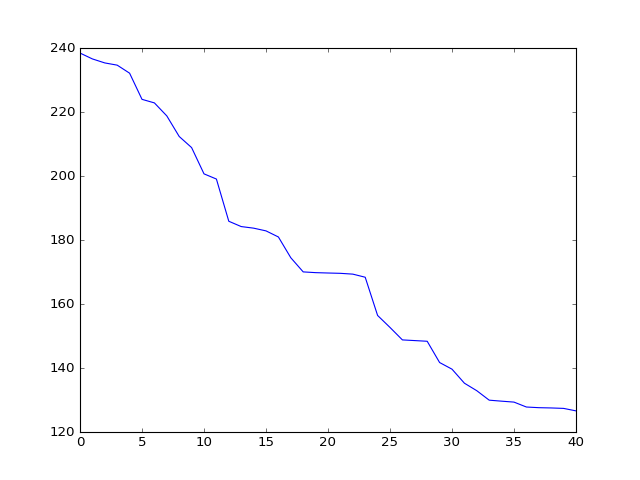

In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot([item[1] for item in nettalk.get_history()[10:]])

In [20]:
def winning_output(outputs):
    """
    Given outputs, what letter is this associated with?
    """
    value = max(outputs)
    index = list(outputs).index(value)
    for key,value in patterns.items():
        if value[index] == 1:
            return key
    return "?"

In [21]:
winning_output([0 for i in range(input_length)])

'N'

In [22]:
import random

def select(outputs):
    index = 0
    partsum = 0.0
    sumFitness = sum(outputs)
    if sumFitness == 0:
        raise Exception("outputs has a sum of zero")
    spin = random.random() * sumFitness
    while index < len(outputs) - 1:
        score = outputs[index]
        if score < 0:
            raise Exception("Negative score: " + str(score))
        partsum += score
        if partsum >= spin:
            break
        index += 1
    return index

In [23]:
pattern_length

29

In [24]:
test = [random.random() for i in range(pattern_length)]

In [25]:
select(test)

26

In [26]:
def winning_output(outputs):
    """
    Given outputs, what letter is this associated with?
    """
    index = select(outputs)
    for key,value in patterns.items():
        if value[index] == 1:
            return key
    return "?"

In [27]:
winning_output(test)

'l'

In [28]:
test2 = [0] * pattern_length
test2[10] = .5
test2[11] = .5

In [33]:
winning_output(test2)

'd'

## 1.2 Jordan Net (1986)

<img src="images/jordan.png" width="480"/>

In [34]:
from conx import Network

class Jordan(Network):
    def initialize_inputs(self):
        self.last_output = [0] * pattern_length 
        self.last_inputs = [0] * (pattern_length * 2)

    def inputs_size(self):
        # Return the number of inputs:
        return len(text)

    def get_letter(self, i):
        if 0 <= i < len(text):
            return text[i]
        else:
            return text[0]
    
    def get_inputs(self, i):
        #import pdb; pdb.set_trace()
        inputs = patterns[self.get_letter(i)] + list(self.last_output)
        targets = patterns[self.get_letter(i)]
        self.last_output = self.propagate(self.last_inputs)
        self.last_inputs = inputs
        return [inputs, targets]

In [35]:
jordan = Jordan(pattern_length * 2, 10, pattern_length)

In [36]:
jordan.train(report_rate=1, max_training_epochs=10)

--------------------------------------------------
Training for max trails: 10 ...
Epoch: 0 TSS error: 1746.01059228 %correct: 0.0
Epoch: 1 TSS error: 357.091669532 %correct: 0.0
Epoch: 2 TSS error: 125.155245219 %correct: 0.0
Epoch: 3 TSS error: 122.93406114 %correct: 0.0
Epoch: 4 TSS error: 121.433076871 %correct: 0.0
Epoch: 5 TSS error: 119.980575008 %correct: 0.0
Epoch: 6 TSS error: 118.31517078 %correct: 0.0
Epoch: 7 TSS error: 116.234642512 %correct: 0.0
Epoch: 8 TSS error: 113.57362279 %correct: 0.0
Epoch: 9 TSS error: 110.311626446 %correct: 0.0
Epoch: 10 TSS error: 106.69250351 %correct: 0.0
--------------------------------------------------
Epoch: 10 TSS error: 106.69250351 %correct: 0.0


## 1.3 Simple Recurrent Network (1990)

<img src="images/srn.png" width="480"/>

In [ ]:
from conx import SRN

class Elman(SRN):
    def initialize_inputs(self):
        pass
    
    def inputs_size(self):
        # Return the number of inputs:
        return len(text)

    def get_letter(self, i):
        if 0 <= i < len(text):
            return text[i]
        else:
            return text[0]
    
    def get_inputs(self, i):
        inputs = patterns[self.get_letter(i)]
        targets = patterns[self.get_letter(i + 1)]
        return [inputs, targets]

In [ ]:
elman = Elman(pattern_length, 10, pattern_length)

In [ ]:
elman.train(report_rate=1, max_training_epochs=10)